In [8]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

import numpy as np
import os
import matplotlib.pyplot as plt


import distutils

1.14.0


In [2]:
print(tf.__version__)

1.14.0


In [3]:

!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2020-11-10 11:53:15--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.126
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.126|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  6.46MB/s    in 3.9s    

2020-11-10 11:53:19 (6.46 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2020-11-10 11:53:19--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.47.52
Connecting to fashion-mnist.s3-website.eu-central-1.amazo

In [4]:
!ls

sample_data		   train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz  train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz


In [5]:
!mkdir MNIST_Fashion
!cp *.gz MNIST_Fashion/

In [6]:
#Importing the MNIST Fashion DataSet.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_Fashion/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_Fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_Fashion/train-labels-idx1-ubyte.gz
Extracting MNIST_Fashion/t10k-images-idx3-ubyte.gz
Extracting MNIST_Fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [15]:
plt.figure(figsize=(1,1))
sample_image=mnist.train.next_batch(1)[0]
print(sample_image[0])


[0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.0509804  0.14509805 0.32156864 0.5647059
 0.15294118 0.         0.         0.         0.18039216 0.4901961
 0.24705884 0.10196079 0.01960784 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00392157 0.         0.02745098 0.23529413
 0.27058825 0.18823531 0.10980393 0.49803925 0.70980394 0.7411765
 0.7568628  0.7843138  0.7176471  0.47058827 0.16078432 0.25490198
 0.30588236 0.19607845 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.25490198 0.21176472 0.12941177 0.14509805
 0.10980393 0.02745098 0.0509804  0.2392157  0.3803922  0.227451
 0.04313726 0.0509804  0.16862746 0.16862746 0.16862746 0.32156864
 0.2784314  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05882353
 0.2392157  0.12941177 0.16078432 0.1294

<Figure size 72x72 with 0 Axes>

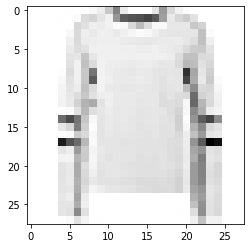

In [23]:
sample_image = sample_image.reshape([28,28])
plt.imshow(sample_image, cmap='Greys')

In [24]:
#Training PArams
learning_rate = 0.0002
batch_size = 128
epochs = 100000

#Network params
image_dim = 784  #img sz is 28x28
gen_hidd_dim = 256
disc_hidd_dim  = 256
z_noise_dim = 100

#fuction to intialise weights (so that divergence is fast)
#For more info :- https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79 

def xavier_init(shape):
  return tf.random_normal(shape = shape, stddev= 1./tf.sqrt(shape[0]/2.0))

# +-  _/6/(_/n1+n2)  




In [25]:
import tensorflow as tf
import numpy as np

In [28]:
#initialising weights and bias for Discriminator and Generator Nueral Networks...(using Xavier initialisation)
weights = {
    "disc_H" : tf.Variable(xavier_init([image_dim,disc_hidd_dim])),
    "disc_final": tf.Variable(xavier_init([disc_hidd_dim,1])),
    "gen_H": tf.Variable(xavier_init([z_noise_dim, gen_hidd_dim])),
    "gen_final": tf.Variable(xavier_init([gen_hidd_dim, image_dim]))
}

bias = {
    "disc_H" : tf.Variable(xavier_init([disc_hidd_dim])),
    "disc_final": tf.Variable(xavier_init([1])),
    "gen_H": tf.Variable(xavier_init([gen_hidd_dim])),
    "gen_final": tf.Variable(xavier_init([image_dim]))
}

In [30]:

#Computational Graph
#defining the Discriminator 
def Discriminator(x):
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["disc_H"]), bias["disc_H"]))
  final_layer = (tf.add(tf.matmul(hidden_layer, weights["disc_final"]), bias["disc_final"]))
  disc_output = tf.nn.sigmoid(final_layer)
  return  disc_output

In [31]:

# Defining the Generator NW
def Generator(x):
  hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, weights["gen_H"]), bias["gen_H"]))
  final_layer = (tf.add(tf.matmul(hidden_layer, weights["gen_final"]), bias["gen_final"]))
  gen_output = tf.nn.sigmoid(final_layer)
  return gen_output

In [32]:
#define placeholders for external input

z_input = tf.placeholder(tf.float32, shape = [None, z_noise_dim], name = "input_noise")
x_input = tf.placeholder(tf.float32, shape = [None, image_dim], name = "real_noise")

In [33]:

#Building the Generator NW
with tf.name_scope("Generator") as scope:
  output_Gen = Generator(z_input) #G(z)
 
 # Building the Disc NW
with tf.name_scope("Discriminator") as scope:
   real_output_disc = Discriminator(x_input) #implements D(x)
   fake_output_disc = Discriminator(output_Gen) # implements D(G(x))

In [34]:
#first kind of loss

with tf.name_scope("Discriminator_Loss") as scope:
  Discriminator_Loss = -tf.reduce_mean(tf.log(real_output_disc+ 0.0001)+tf.log(1.- fake_output_disc+0.0001))
  # LF= log(D(x))+log(1-D(G(z)));
  
with tf.name_scope("Genetator_Loss") as scope:
  Generator_Loss = -tf.reduce_mean(tf.log(fake_output_disc+ 0.0001)) # due to max log(D(G(x)))
  #LF= log(1-D(G(z)))  -> -log(D(G(z)));
  # T-board summary
  
  Disc_loss_total = tf.summary.scalar("Disc_Total_loss", Discriminator_Loss)
  Gen_loss_total = tf.summary.scalar("Gen_loss", Generator_Loss)

In [ ]:
''''#second kind of loss
with tf.name_scope("Discriminator_Loss") as scope:
  Disc_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = real_output1_Disc, labels = tf.ones_like(real_output1_Disc)))
  Disc_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_output1_Disc, labels = tf.zeros_like(fake_output1_Disc)))
  Discriminator_Loss = Disc_real_loss + Disc_fake_loss

  
with tf.name_scope("Genetator_Loss") as scope:
  Generator_Loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_output1_Disc, labels = tf.ones_like(fake_output1_Disc)))
  
  # Tensorboarf summary
  
Disc_loss_real_summary = tf.summary.scalar('Disc_loss_real', Disc_real_loss)
Disc_loss_fake_summary = tf.summary.scalar('Disc_loss_fake', Disc_fake_loss)
Disc_loss_summary = tf.summary.scalar('Disc_total_loss', Discriminator_Loss)

'''

In [36]:
#Making seperate dictionary for current weights and biases of Generator and Discriminator NW
Generator_var = [weights["gen_H"], weights["gen_final"], bias["gen_H"], bias["gen_final"]]
Discriminator_var = [weights["disc_H"], weights["disc_final"], bias["disc_H"], bias["disc_final"]]

#Define the optimizer

with tf.name_scope("Optimizer_Discriminator") as scope:
  Discriminator_optimize = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(Discriminator_Loss, var_list = Discriminator_var)

with tf.name_scope("Optimizer_Generator") as scope:
  Generator_optimize = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(Generator_Loss, var_list = Generator_var)

In [37]:

# Initialize the variables

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)
writer = tf.summary.FileWriter("./log", sess.graph)

for epoch in range(epochs):
  #dividing into batches
  x_batch, _ = mnist.train.next_batch(batch_size)
  
  #Generate noise to feed Discriminator
  z_noise = np.random.uniform(-1.,1.,size = [batch_size, z_noise_dim])
  #Discriminator
  _, Disc_loss_epoch = sess.run([Discriminator_optimize, Discriminator_Loss], feed_dict = {x_input:x_batch, z_input:z_noise})
  #Generator
  _, Gen_loss_epoch = sess.run([Generator_optimize, Generator_Loss], feed_dict = {z_input:z_noise})  
  
  #Running the Discriminator summary
  summary_Disc_loss = sess.run(Disc_loss_total, feed_dict = {x_input:x_batch, z_input:z_noise})
  # Adding the Discriminator summary
  writer.add_summary(summary_Disc_loss, epoch)
  
  #Running the Generator summary
  summary_Gen_loss = sess.run(Gen_loss_total, feed_dict = {z_input:z_noise})
  # Adding the Generator summary
  writer.add_summary(summary_Gen_loss, epoch)
  
  if epoch % 2000 == 0:
    print("Steps: {0}: Generator Loss: {1}, Discriminator Loss:{2}".format(epoch, Gen_loss_epoch, Disc_loss_epoch))

Steps: 0: Generator Loss: 0.50946044921875, Discriminator Loss:1.759146809577942
Steps: 2000: Generator Loss: 5.7825188636779785, Discriminator Loss:0.02183854579925537
Steps: 4000: Generator Loss: 3.9697022438049316, Discriminator Loss:0.10746048390865326
Steps: 6000: Generator Loss: 3.395000457763672, Discriminator Loss:0.12345637381076813
Steps: 8000: Generator Loss: 2.6816887855529785, Discriminator Loss:0.22024385631084442
Steps: 10000: Generator Loss: 2.346019744873047, Discriminator Loss:0.3768424689769745
Steps: 12000: Generator Loss: 2.405149221420288, Discriminator Loss:0.5288443565368652
Steps: 14000: Generator Loss: 2.662179946899414, Discriminator Loss:0.4213481843471527
Steps: 16000: Generator Loss: 2.0883986949920654, Discriminator Loss:0.6112837791442871
Steps: 18000: Generator Loss: 2.2393980026245117, Discriminator Loss:0.6767270565032959
Steps: 20000: Generator Loss: 2.335692882537842, Discriminator Loss:0.5738281011581421
Steps: 22000: Generator Loss: 2.254939079284

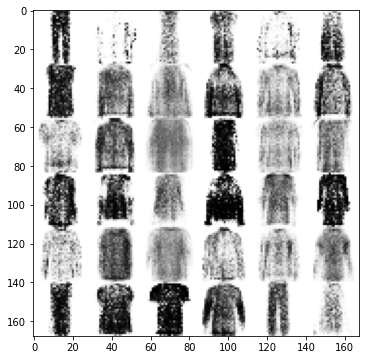

In [40]:
#Testing
# Generate images from noise, using the generator network
import matplotlib.pyplot as plt
n = 6
canvas = np.empty((28*n, 28*n))
for i in range(n):
  #Noise input
  z_noise = np.random.uniform(-1.,1., size = [batch_size, z_noise_dim])
  # Generate image from noise
  g = sess.run(output_Gen, feed_dict = {z_input:z_noise})
  # Reverse colors for better display
  g=-1*(g-1)
  for j in range(n):
    #Draw the generated images
    canvas[i*28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])
    
plt.figure(figsize = (n,n))
#plt.imshow(canvas, origin = "upper", cmap = "gray")
plt.imshow(canvas, origin = "upper", cmap = "gray")
plt.show()

In [50]:
!pip install tensorboardcolab

In [52]:
#import tensorboardcolab as tb

from tensorboardcolab import *
tbc = tb.TensorBoardColab()

ImportError: ignored